# Reverse Engineering the inspectieorders API


## To do:
[] plantuml png handmatig => automatisch <br>

## Contents:
1. Basic info of the API and inspection
2. Getting the paths and endpoints
3. Getting the objects with attributes
4. Writing it to json, plantuml and .csv

## 1. Basic info of the API and inspection

In [1]:
pwd

'C:\\Users\\31653\\Documents\\GitHub\\Notebooks\\de_alliantie'

In [2]:
import glob
my_jsons=glob.glob('*.json')
my_yamls = glob.glob('*.yaml')
my_jsons, my_yamls

(['planningsverzoeken-api.json',
  'planningsverzoeken-api_data.json',
  'Saxton API_data.json',
  'saxton.json'],
 ['saxton.yaml'])

In [2]:
#loading the API into active dictionary
import json

with open('C:\\Users\\31653\\Desktop\\DeAlliantie\inspectieorders-api.json') as f:
    spec = json.load(f)

In [3]:
list(spec)

['swagger',
 'info',
 'host',
 'tags',
 'schemes',
 'paths',
 'definitions',
 'security',
 'securityDefinitions',
 'basePath']

In [4]:
spec['schemes']

['https']

In [7]:
#version is too long and missing a 'v'
API_version =spec['info']['version']
API_version = "v"+API_version[:5]
OAS_version =spec['swagger']
API_name = spec['info']['title']
print("OAS:", OAS_version, API_name, API_version)

OAS: 2.0 inspectieorders-api v1.0.4


## 2. Getting the paths and endpoints

In [8]:
paths =list(spec['paths'])
print(len(paths))
paths

1


['/v1/onderhoud/inspectieorders']

In [9]:
endpoints_dict = {}
for i in range (len(paths)):
    endpoints_dict[paths[i]]=list(spec['paths'][paths[i]])
endpoints_dict 

{'/v1/onderhoud/inspectieorders': ['get', 'post']}

## 3. Getting the objects

In [10]:
#inspection of the objects
spec['definitions']

{'Eenheid': {'type': 'object',
  'properties': {'identificatie': {'type': 'string'}}},
 'BouwkundigElement': {'type': 'object',
  'properties': {'identificatie': {'type': 'string'},
   'naam': {'type': 'string'},
   'omschrijving': {'type': 'string'}}},
 'InspectieOrder': {'type': 'object',
  'properties': {'identificatie': {'type': 'string'},
   'omschrijving': {'type': 'string'},
   'onderhoudSoort': {'type': 'string'},
   'begindatum': {'type': 'string', 'format': 'date-time'},
   'einddatum': {'type': 'string', 'format': 'date-time'},
   'uitvoerende': {'type': 'string'},
   'extraElementen': {'$ref': '#/definitions/ExtraElementenInspectie'}}},
 'Huurovereenkomst': {'type': 'object',
  'properties': {'identificatie': {'type': 'string'}}},
 'ExtraElementenInspectie': {'type': 'object',
  'properties': {'uitvoerendeInterneIdentificatie': {'type': 'string'},
   'prognoseDoorverhuren': {'type': 'string'},
   'bouwkundigeElementen': {'type': 'array',
    'items': {'$ref': '#/definitions

In [13]:
objects = list(spec['definitions'])
print(len(objects))
objects

7


['Eenheid',
 'BouwkundigElement',
 'InspectieOrder',
 'Huurovereenkomst',
 'ExtraElementenInspectie',
 'FinancieelBedrijf',
 'ErrorResponse']

In [15]:
#creating a dictionary with objects and their properties
object_dict ={}
objects = list(spec['definitions'])
for i in range (len(objects)):
    try:
        object_dict[objects[i]]=list(spec['definitions'][objects[i]]['properties'])#['properties']
    except:
        pass
object_dict

{'Eenheid': ['identificatie'],
 'BouwkundigElement': ['identificatie', 'naam', 'omschrijving'],
 'InspectieOrder': ['identificatie',
  'omschrijving',
  'onderhoudSoort',
  'begindatum',
  'einddatum',
  'uitvoerende',
  'extraElementen'],
 'Huurovereenkomst': ['identificatie'],
 'ExtraElementenInspectie': ['uitvoerendeInterneIdentificatie',
  'prognoseDoorverhuren',
  'bouwkundigeElementen',
  'bedrijf',
  'huurovereenkomst',
  'eenheid'],
 'FinancieelBedrijf': ['identificatie'],
 'ErrorResponse': ['timestamp', 'status', 'error', 'message']}

In [16]:
#converting the python dict to a JSON 
import json 
      
# Serializing json  
json_object = json.dumps(object_dict, indent = 4) 
print(json_object)

{
    "Eenheid": [
        "identificatie"
    ],
    "BouwkundigElement": [
        "identificatie",
        "naam",
        "omschrijving"
    ],
    "InspectieOrder": [
        "identificatie",
        "omschrijving",
        "onderhoudSoort",
        "begindatum",
        "einddatum",
        "uitvoerende",
        "extraElementen"
    ],
    "Huurovereenkomst": [
        "identificatie"
    ],
    "ExtraElementenInspectie": [
        "uitvoerendeInterneIdentificatie",
        "prognoseDoorverhuren",
        "bouwkundigeElementen",
        "bedrijf",
        "huurovereenkomst",
        "eenheid"
    ],
    "FinancieelBedrijf": [
        "identificatie"
    ],
    "ErrorResponse": [
        "timestamp",
        "status",
        "error",
        "message"
    ]
}


## 4. Writing it to a .json, plantuml and .csv file

In [17]:
#writing it to a json
import json
with open(API_name+'_data.json', 'w', encoding='utf-8') as f:
    json.dump(json_object, f, ensure_ascii=False, indent=4)

In [18]:
import glob
my_jsons = glob.glob('*.json')
my_jsons

['inspectieorders-api_data.json',
 'onderhoudsverzoeken-api_data.json',
 'planningsverzoeken-api.json',
 'planningsverzoeken-api_data.json',
 'Saxton API_data.json',
 'saxton.json']

In [19]:
textfile = open("plantuml_"+API_name+"_data.txt", "w")
textfile.write('@startuml\n')
for key, value in object_dict.items():
    textfile.write('class '+str(key) +'{\n')
    for i in range (len(value)):
        textfile.write(value[i] + "\n")
    textfile.write('}\n')
textfile.write('@enduml')
textfile.close()

In [20]:
import glob
my_txts = glob.glob('*.txt')
my_txts

['onderhoudsverzoeken-api_API_plantuml.txt',
 'plantuml_inspectieorders-api_data.txt',
 'plantuml_planningsverzoeken-api_data.txt',
 'plantuml_planningsverzoeken.txt',
 'plantuml_Saxton API_data.txt',
 'plantuml_Saxton_API_data.txt',
 'Saxton_API_datamodel_A.txt',
 'Saxton_API_datamodel_C.txt',
 'Saxton_API_datamodel_D-G.txt',
 'Saxton_API_datamodel_H-M.txt',
 'Saxton_API_datamodel_N-Z.txt']

In [21]:
#check the plantuml file manually
%pycat C:\\Users\\31653\\Documents\\GitHub\\Notebooks\\de_alliantie\plantuml_inspectieorders-api_data.txt

In [22]:
#convert the txt file to an .png image using plantuml
!python -m plantuml plantuml_inspectieorders-api_data.txt

[{'filename': 'plantuml_inspectieorders-api_data.txt', 'gen_success': True}]


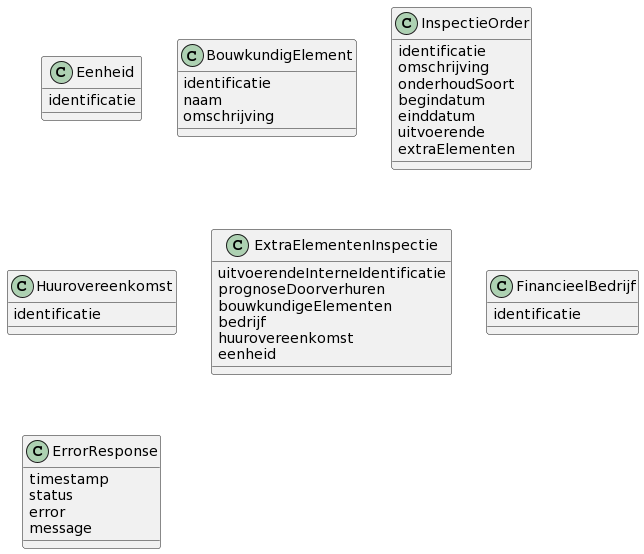

In [23]:
#show the generated png
from IPython import display
display.Image(filename="plantuml_inspectieorders-api_data.png", width=1200, height=500)

## Write it to a .csv file

 a .csv file with a ; seperator between key and values

In [24]:
with open(API_name+"_data.csv", mode="w") as pv:
    for key, value in object_dict.items():
        pv.write(str(key)+";")
        for i in range (len(value)-1):
            pv.write(value[i]+",")#write values + a comma  
        pv.write(value[-1]+"\n") #write last value (and no comma) 

In [25]:
import glob
my_csvs=glob.glob('*.csv')
my_csvs

['inspectieorders-api_data.csv',
 'onderhoudsverzoeken-api_data.csv',
 'planningsverzoeken-api_data.csv',
 'PlanProposal.csv',
 'Saxton API_API_objecten.csv',
 'Saxton API_data.csv',
 'ServiceTask.csv',
 'ServiceTaskID.csv']

In [27]:
#check the plantuml file manually
%pycat C:\\Users\\31653\\Documents\\GitHub\\Notebooks\\de_alliantie\\inspectieorders-api_data.csv